#  D B Scan & Hierarchical Clustering in Macine Learning 

# Aim: To Apply DB Scan Clustering on Mall-Customers Dataset .
procedure:
1) Import the necessary libraries 
2) Remove the feature customer id Bcuz it isnt corelated with income .
3) Draw the heatmap, PIE chart which says females are visiting more to mall than males .
4) By using countplot, find the people age between 25-40 & Compare to other age groups.
5) Draw the boxplot of genders & their Spending Score .
6) Find the salary of the people who have mostly visited the mall .
7) Apply DB Scan Algorithm by making the clusters based on Epsilon, mean-points & Noise .
8) Also predict the core pionts, border points & outliers(noise) efficiently .

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv(r"C://Users//Jayastu//Desktop//B.Sc Data Science Symbiosis//Semester 4//Machine Learning 2//Mall_Customers.csv")
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df1.drop(['CustomerID'],axis=1,inplace=True)
df1.describe()

In [14]:
df1.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

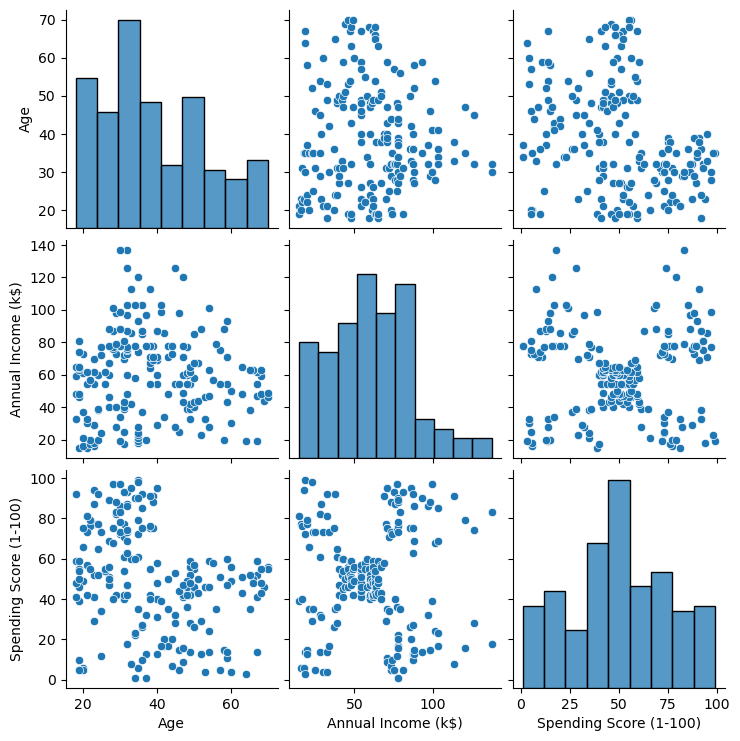

In [16]:
var1 = sns.pairplot(df1)

C:\Users\Jayastu\AppData\Local\Temp\ipykernel_19700\1202299351.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')


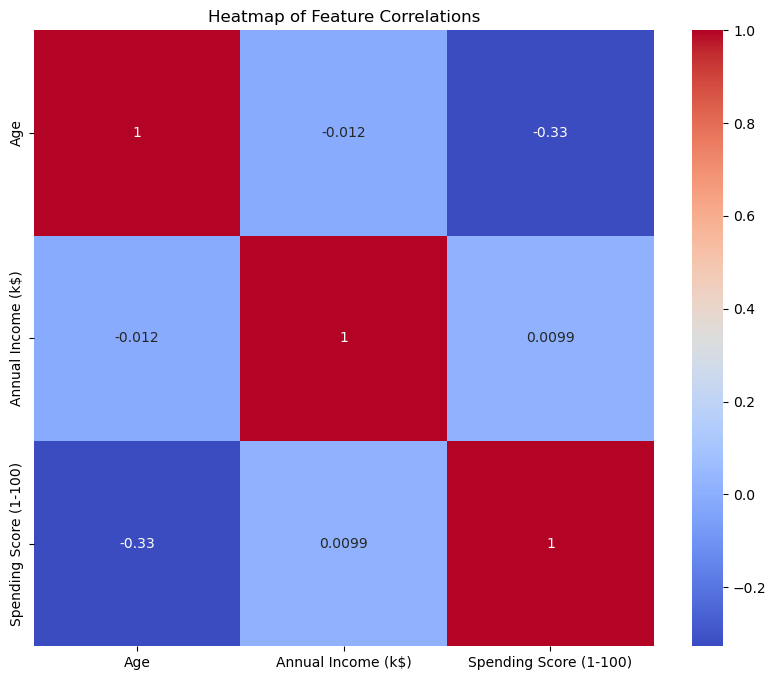

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

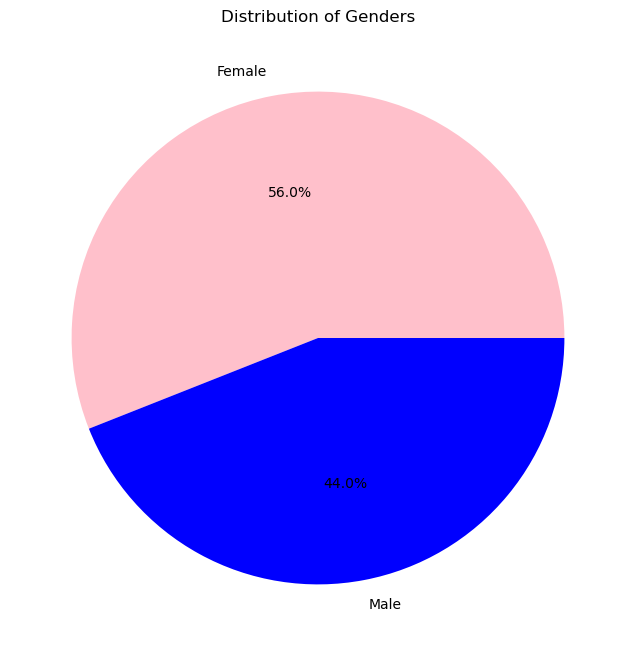

In [46]:
# Pie chart to show the distribution of genders

gender_counts = df1['Genre'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Distribution of Genders')
plt.show()

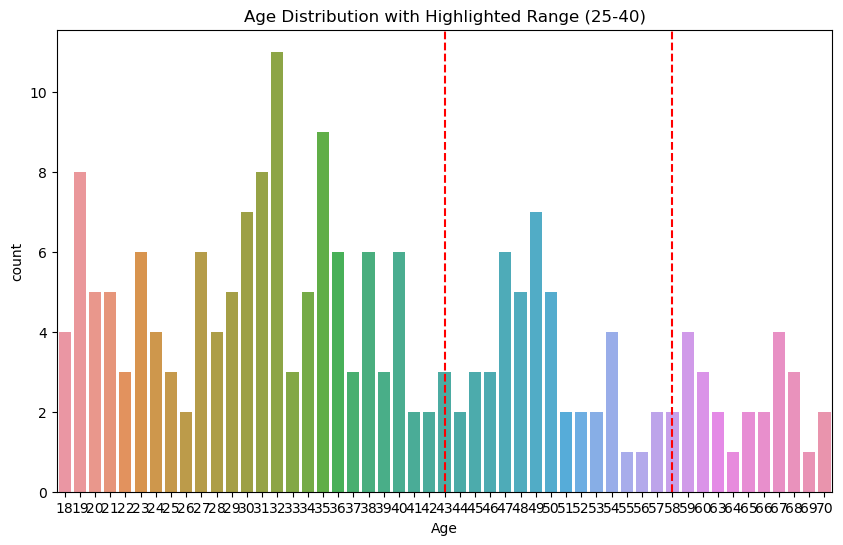

In [42]:
# Countplot of ages between 25-40 & comparison to other age groups

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df1)
plt.axvline(25, color='red', linestyle='--')
plt.axvline(40, color='red', linestyle='--')
plt.title('Age Distribution with Highlighted Range (25-40)')
plt.show()

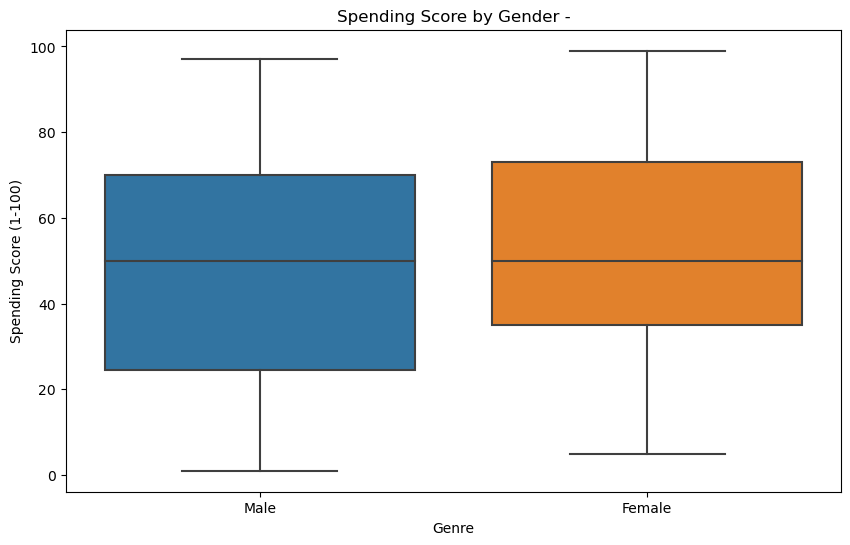

In [7]:
# Draw the boxplot of genders and their Spending Score

plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df1)
plt.title('Spending Score by Gender -')
plt.show()

In [54]:
# Find the salary of the people who have mostly visited the mall
# People of Salary 54k and 78k are the mostly visited persons in mall .

top_spenders = df1.sort_values(by='Spending Score (1-100)', ascending=False).head(10)
print('Top 10 Visitors Based on Spending Score:')
print(top_spenders[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

Top 10 Visitors Based on Spending Score:
      Genre  Age  Annual Income (k$)  Spending Score (1-100)
11   Female   35                  19                      99
19   Female   35                  23                      98
145    Male   28                  77                      97
185    Male   30                  99                      97
127    Male   40                  71                      95
167  Female   33                  86                      95
7    Female   23                  18                      94
141    Male   32                  75                      93
163  Female   31                  81                      93
41     Male   24                  38                      92


Text(0, 0.5, 'Spendscore')

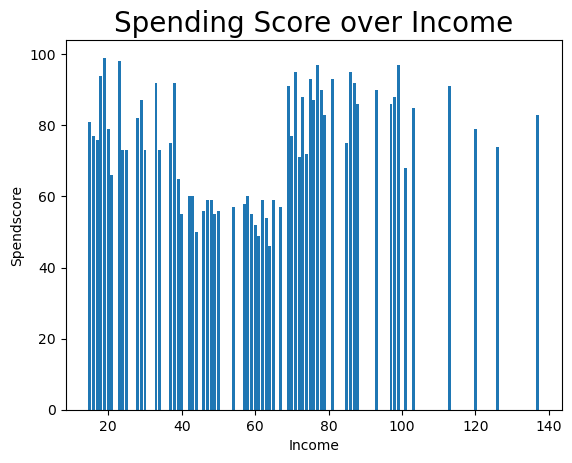

In [9]:
plt.bar(df1['Annual Income (k$)'], df1['Spending Score (1-100)'])
plt.title("Spending Score over Income",fontsize=20)
plt.xlabel("Income")
plt.ylabel("Spendscore")
# Peoples of income in the range of 20k-40k and 70k-100k have the highest spend score

# Applying the DB Scan Algorithm

# We are going to use the DBSCAN  for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it. It is better than hierarchical and k-means clustering algorithm. It makes the clusters based on the parameters like epsilon,min points and noise.It separately predicts the core points, border points and outliers efficiently.

In [12]:
x=df1.iloc[:,[2,3]].values
x.shape

(200, 2)

In [14]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model=db.fit(x)
label=model.labels_

In [16]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 14


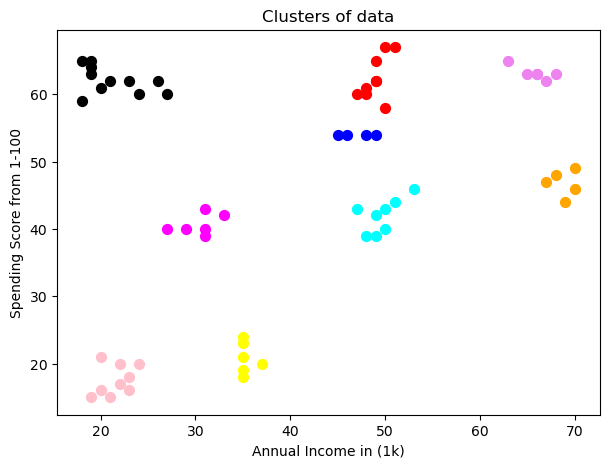

In [18]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

df1['Cluster'] = clusters

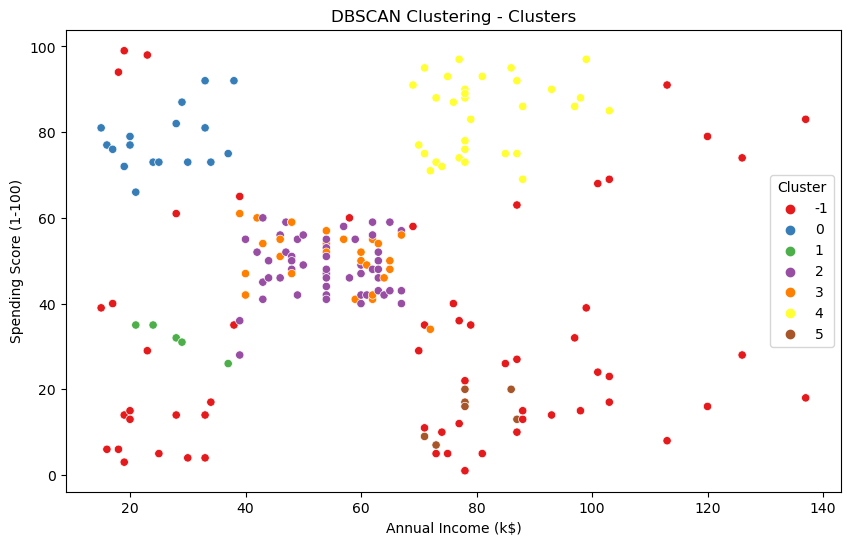

In [59]:
# Plotting the clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('DBSCAN Clustering - Clusters')
plt.show()

In [61]:
# Predict the core points, border points, and outliers (noise)

core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
df1['Core Point'] = core_samples_mask

print('Cluster Analysis:')
print(df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

Cluster Analysis:
     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39       -1
1     21                  15                      81        0
2     20                  16                       6       -1
3     23                  16                      77        0
4     31                  17                      40       -1
..   ...                 ...                     ...      ...
195   35                 120                      79       -1
196   45                 126                      28       -1
197   32                 126                      74       -1
198   32                 137                      18       -1
199   30                 137                      83       -1

[200 rows x 4 columns]


# Hierarchical Clustering -

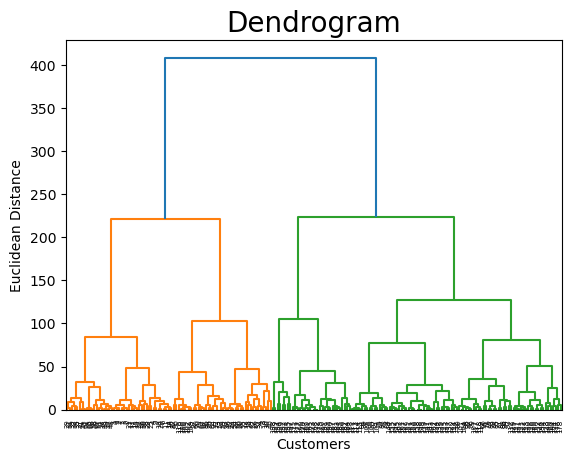

In [26]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(x,method = 'ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()